<center><h2> CPE 4040 Spring 2024: Midterm Practice</h2></center>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

<h2> Q1: Happy Twosday! </h2>

February 22, 2022 was a rare day that all five digits of the date, 22222, are twos. The string is both __palindrome__ and __symmetric__. Recall that 
   - A sequence is said to be `palindrome` if one half of the string is the reverse of the other half, e.g., "madam".
   - A sequence is said to be `symmetrical` if both halves of the string are the same, e.g., "abcabc".
   - If the length of a sequence is an odd number, the middle element in the sequence is not considered. 

### Q1.1 Write a Python program to confirm that February 22 (22222) is indeed palindrome and symmetrical.

### Q1.2 There are more dates in February 2022 that are also both palindrome and symmetric (such as 22122). 
#### Write a Python loop to find out all the other dates.__

<h2>Q2: Generalized Checker Board</h2>

<h2>Q3: Array Processing </h2>

### Q3.1 Given a 1-D array A=[1,2,3,4,5], create a new array that inserts 4 consecutive zeros between each pair of values. 
#### That is, your result should be B=[1,0,0,0,0,2,0,0,0,0,3,0,0,0,0,4,0,0,0,0,5,0,0,0,0]

### Q3.2 Given an array of random integers (from 0 to 9) as below. Write a code to find the top three most frequent values in the array. 

In [37]:
Z = np.random.randint(0,10,1000)

### <font color=green> Approach 1: Using Dictionary

In [38]:
count = {}

for x in Z:
    if x in count:
        count[x] += 1
    else:
        count[x] = 1
        
print (count)

{8: 104, 9: 99, 4: 93, 3: 108, 1: 113, 0: 96, 5: 92, 6: 107, 7: 98, 2: 90}


In [39]:
# Trying to sort the dictionary by the values.
# There is no sort method for dict, however, we can use sorted()
# to sort the dict.items(), which is a tuple

a = sorted(count.items(), key=lambda x:x[1])  # a is a tuple
a

[(2, 90),
 (5, 92),
 (4, 93),
 (0, 96),
 (7, 98),
 (9, 99),
 (8, 104),
 (6, 107),
 (3, 108),
 (1, 113)]

In [48]:
a[::-1][:3]

[(1, 113), (3, 108), (6, 107)]

### <font color=green> Approach 2: NumPy way

In [57]:
# Research to find out what np.bincount() can do.

bin = np.bincount(Z)
bin

array([ 96, 113,  90, 108,  93,  92, 107,  98, 104,  99])

In [52]:
# Now we know the bin counts, how about getting the index for the top value?
# Use arr.argmax()

bin.argmax()

1

In [63]:
## What about top 3 values?
## This is a bit tricky. You will use np.unique() & np.argsort()

## np.unique(arr) is a versatile function that returns the unique
## values in arr, as well as counts, indices etc.

u, counts = np.unique(Z, return_counts=True)
print (u, counts)

[0 1 2 3 4 5 6 7 8 9] [ 96 113  90 108  93  92 107  98 104  99]


In [71]:
## Use np.argsort(arr) to sort the counts in ascending order.
## To get descending order, what do we do?

np.argsort(-counts)

array([1, 3, 6, 8, 9, 7, 0, 4, 5, 2])

In [76]:
top3_indices = np.argsort(-counts)[:3]
top3_values = u[top3_indices]

print (top3_values)

[1 3 6]


### Q3.3 Given a 2-D array below, calculate the mean of each row then subtract the mean from each element. 

In [37]:
X = np.random.rand(5, 6)
X

array([[0.2324103 , 0.00771714, 0.92465054, 0.6302269 , 0.43510648,
        0.6209602 ],
       [0.53824805, 0.67558292, 0.75783305, 0.89531206, 0.75500004,
        0.07231862],
       [0.09113127, 0.10654291, 0.42963153, 0.03965038, 0.5633766 ,
        0.1328156 ],
       [0.42066619, 0.32037427, 0.77945224, 0.38259311, 0.78918952,
        0.3603117 ],
       [0.34119038, 0.87709431, 0.08281462, 0.24038142, 0.14831714,
        0.55148931]])

<h2> Q4: More Array Slicing: Swapping Elements in an Array

### Q4.1 Swap the data of row 1 and 4 of the array, A.

In [5]:
A = np.arange(20).reshape(5,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

### Q4.2 Swap the data of column 0 and 3 of A.

### Q4.3 Swap the data in row 0, column 0 with the data in row 4, column 3

## Q5: More Array Manipulations 

## Q6: Square Wave and Random Noise

__A communication system is commonly modelled by the transmitted signal, the channel, and the receiver.__ 

__Let's consider a simple system where the signal is a `square wave` and the the channel adds `white Gaussian noise_` to the signal. Therefore, the received signal is represented by__

__$r(t) = s(t) + n(t)$, where $s(t)$ = square wave, $n(t)$ = Gaussian noise__

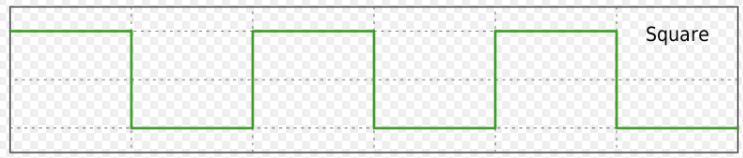

#### Q6.1 One simple way to generate a periodic square wave is to take a `sign function` on the sine wave, that is,
   
    Sq(t) = 1, if sin(2*pi*f*t) > 0;
           -1, if sin(2*pi*f*t) < 0; 
          
* Plot a 5-second __square wave__ with amplitude 1, $f$ = 5Hz and sampling rate $f_s$ = 100Hz. Use Matplotlib to plot the signal. You should have a total of 500 samples. 

* Properly label the x-axis ("Time"), and y-axis ("Amplitude").

* Hint: Use the __generate_sine_wave()__ function below

In [11]:
def generate_sine_wave(freq, sample_rate, duration):

    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    y = np.sin((2 * np.pi) * freq * t)
    
    return t, y

In [15]:
fs = 100
duration = 5   # 5-second 
f = 5    # the center frequency
time, x = generate_sine_wave(f, fs, duration)

# use booean array
# sq = x.copy()  
# sq[sq > 0] = 1
# sq[sq < 0] = -1

sq = x.copy()      # This is not necessary. I just want to keep a copy of the original array
print ((time.size))

sq[sq > 0] = 1
sq[sq < 0] = -1

500


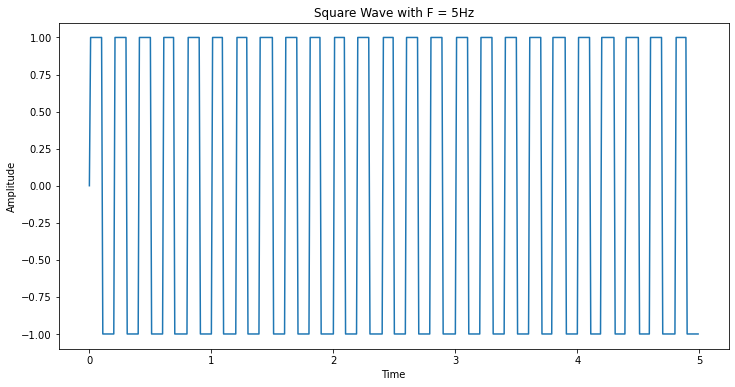

In [16]:
plt.figure(figsize=(12,6))
plt.title('Square Wave with F = 5Hz')
plt.plot(time, sq)
#plt.xlim(0, 0.5)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

#### Q6.2: Create an array of Gausian noise with mean = 0 and standard deviation = 0.5. 
#### Use `np.random.normal` to generate the noise array. The size of the noise array should also be 500.

Add the square wave array from Q6.1 and the noise array together. Plot the resulting array.

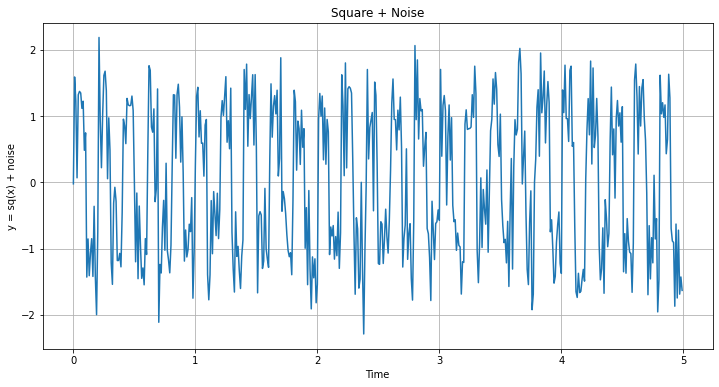

In [17]:
n = np.random.normal(scale=0.5, size=x.size)

y = sq + n

plt.figure(figsize=(12,6))

plt.plot(time, y)       # signal + noise
plt.title('Square + Noise')
plt.xlabel('Time')
plt.ylabel('y = sq(x) + noise')
plt.grid(True, which='both')

#### Q6.3: Signal-to-noise ratio (SNR) is an important quality indicator of the communication channel. The higher the SNR, the better the channel quality.

     SNR(dB) = 10log10(P_s/P_n), where P_s is the average signal power and P_n is the average noise power.

#### Please calculate the SNR(dB) of this case. The average power of a sequence of signals = $\sum_{i=1}^N s^2/N$, where $N$ is the number of samples

In [18]:
# SNR = Signal-to-Noise ratio = (Average Singal Power)/(Average Noise Power)
# Average power of a sequence of signals = SUM (s^2)/N, where N is # of samples 
 
n_samples = sq.size     # should be 500 samples

P_s = np.sum(sq**2)/n_samples
P_n = np.sum(n**2)/n_samples

print ('Ave. signal power = %.3f'%P_s)
print ('Ave. noise power = %.3f'%P_n)

SNR = 10 * (np.log10(P_s/P_n))   # express SNR in dB
print ('SNR = %.2f dB' % SNR )

# Side note: the average power of a square wave is always A^2, A=amplitude of the square wave.
# The average power of a white noise is actually its variance = square of standard deviation (std).
# In this case, std = 0.5, so variance = 0.25
# So, the simulation confirms the theoretical calculation.

Ave. signal power = 0.998
Ave. noise power = 0.264
SNR = 5.78 dB
